In [22]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Loading Dataset

In [25]:
# Creating the dataframe
df = pd.read_csv('creditcard.csv')

Function to plot per-column distribution

In [28]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    # Ensure nGraphRow is an integer using integer division //
    nGraphRow = (nCol + nGraphPerRow - 1) // nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

Funtion to plot correlation matrix

In [31]:
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna(axis=1)  # drop columns with NaN, use axis=1 for columns
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()

    # Handle NaN and infinite values in the correlation matrix
    corr = corr.fillna(0)  # Replace NaN with 0
    corr = corr.replace([np.inf, -np.inf], 0)  # Replace infinities with 0

    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')

    # The issue was likely due to NaN or inf values in the correlation matrix
    # Replacing them with 0 and using 'fignum=None' seems to solve the problem
    corrMat = plt.matshow(corr, fignum=None)  # Remove or change fignum to None

    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

Funtion to plot Scatter Matrix

In [34]:
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna(axis=1)  # Changed 'columns' to axis=1
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

Loading Subset of the Dataset 

In [37]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# creditcard.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('creditcard.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'creditcard.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 31 columns


Displaying First 5 Rows

In [40]:
df1.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Plotting value Distributions

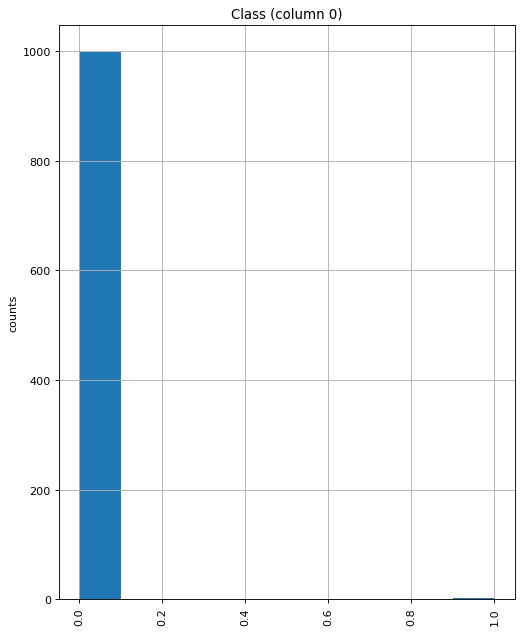

In [43]:
plotPerColumnDistribution(df1, 10, 5)

Plotting Correlation Matrix

<Figure size 640x640 with 0 Axes>

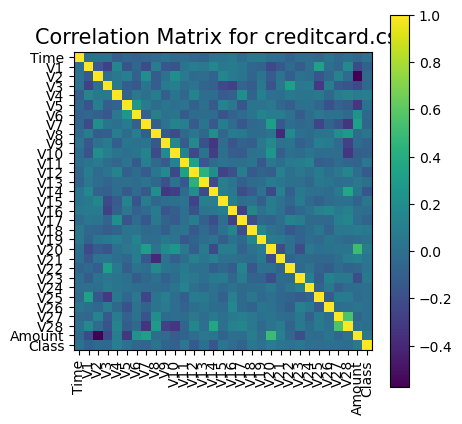

In [46]:
plotCorrelationMatrix(df1, 8)

Plotting Scatter Matrix

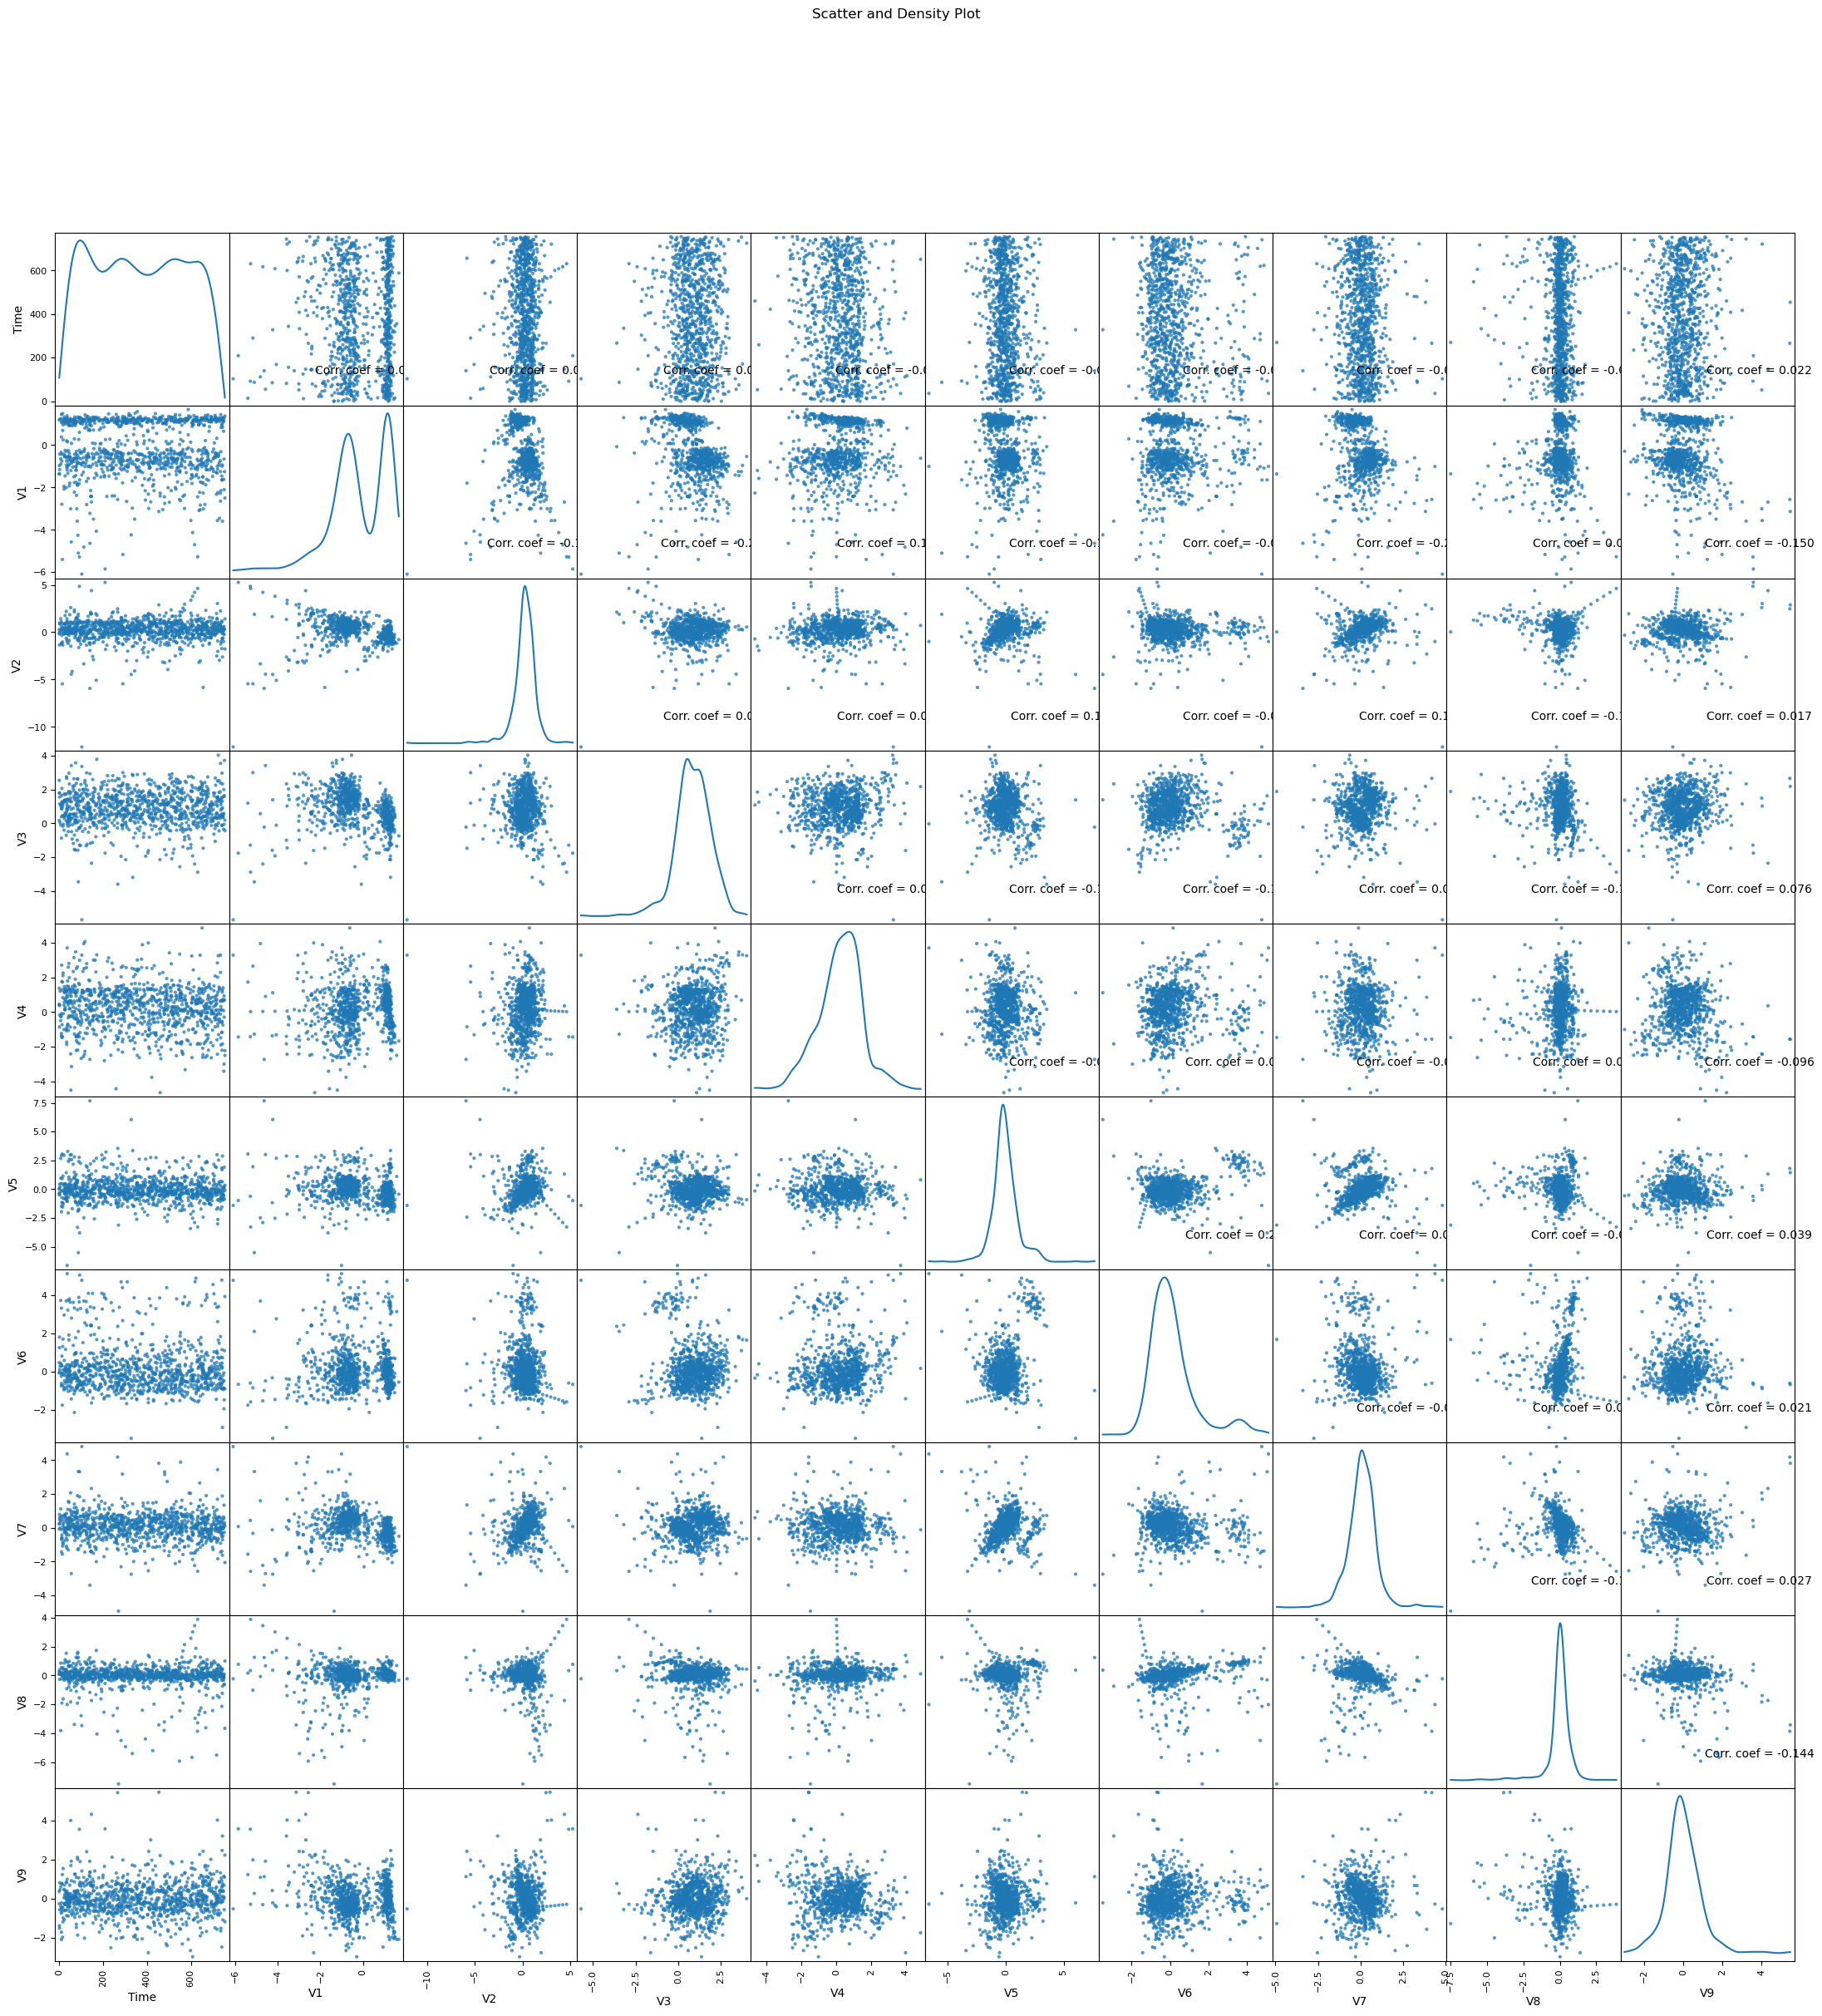

In [49]:
plotScatterMatrix(df1, 27, 10)

Installing hyperopt 

In [51]:
!pip install -q hyperopt

Importing libraries and Data splitting

In [55]:
from sklearn.metrics import accuracy_score, auc, balanced_accuracy_score, confusion_matrix, f1_score, precision_score, average_precision_score, roc_auc_score,  recall_score,  precision_recall_curve #some scoring functions

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, IsolationForest, RandomForestClassifier # Some classifiers
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate, train_test_split #Cross validation tools, and a train/test split utility
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV #Hyper parameter search tools
from hyperopt import hp, tpe, STATUS_OK, fmin, Trials #Hyperparameter search using a loss function
# creditcard.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows

print(f'There are {nRow} rows and {nCol} columns')
X = df.iloc[:, 1:30]
y = df.iloc[:, 30:31]
X.head(), y.head()

There are 1000 rows and 31 columns


(         V1        V2        V3        V4        V5        V6        V7  \
 0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
 1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
 2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
 3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
 4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
 
          V8        V9       V10  ...       V20       V21       V22       V23  \
 0  0.098698  0.363787  0.090794  ...  0.251412 -0.018307  0.277838 -0.110474   
 1  0.085102 -0.255425 -0.166974  ... -0.069083 -0.225775 -0.638672  0.101288   
 2  0.247676 -1.514654  0.207643  ...  0.524980  0.247998  0.771679  0.909412   
 3  0.377436 -1.387024 -0.054952  ... -0.208038 -0.108300  0.005274 -0.190321   
 4 -0.270533  0.817739  0.753074  ...  0.408542 -0.009431  0.798278 -0.137458   
 
         V24       V25       V26       V27       V28  

Splitting Data into training and testing data

In [57]:
# Let's split our dataset and see what it looks like:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.25)
training_fraud = sum(y_train.values)
training_fraud_pct = sum(y_train.values)/len(y_train.values)*100
test_fraud = sum(y_test.values)
test_fraud_pct = sum(y_test.values)/len(y_test.values)*100
print("X train: {}\nX test:  {}\ny_train: {}\ny test:  {} \nFraud in train set: {},   {:2f}%\nFraud in test set:  {},  {:2f}%\n".format( X_train.shape,X_test.shape,y_train.shape,y_test.shape,training_fraud[0], training_fraud_pct[0],test_fraud[0], test_fraud_pct[0]))


X train: (213605, 29)
X test:  (71202, 29)
y_train: (213605, 1)
y test:  (71202, 1) 
Fraud in train set: 369,   0.172749%
Fraud in test set:  123,  0.172748%



Model Building and Validation

In [ ]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train.values.ravel())
y_pred = clf.predict(X_test) # Using our test set, let's try and make some predictions
confusion_matrix(y_test, y_pred) # How did we do?
# TN FN
# FP TP
def print_scores(y_t, y_p):
    print(f'Accuracy  :{accuracy_score(y_t, y_p):.2f}' )
    print(f'Balanced  :{balanced_accuracy_score(y_t, y_p):.2f}' )
    print(f'F1        :{f1_score(y_t, y_p):.2f}' )
    print(f'Precision :{precision_score(y_t, y_p):.2f}' )
    print(f'Recall    :{recall_score(y_t, y_p):.2f}' )
    print(f'roc auc   :{roc_auc_score(y_t, y_p):.2f}' )
    print(f'pr)auc    :{average_precision_score(y_t, y_p):.2f}' )
print_scores(y_test, y_pred)

In [ ]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
clf = RandomForestClassifier(n_jobs=-1,n_estimators=10, verbose=0)
# ... but this time, let's fit our model using sklearn.model_selection.cross_val_score
cvs = cross_val_score(clf,X=X_train, y=y_train, scoring='average_precision')
print(f'Using {len(cvs)} trials:\n {cvs}')
print(f'Average:{np.mean(cvs)}')

In [56]:
cvs = cross_validate(clf,X=X_train, y=y_train, scoring=['accuracy','average_precision','balanced_accuracy','f1','precision','recall','roc_auc'])
for k, v in cvs.items():
    print(f'{k.replace("test_",""):23}{v}   Avg:{"":4}{np.mean(v):.2f}' )

fit_time               [ 9.6578064   8.23431516  8.97718406 11.56358099  8.56229353]   Avg:    9.40
score_time             [0.10917521 0.20153856 0.12004066 0.22768736 0.2024169 ]   Avg:    0.17
accuracy               [0.99941481 0.99950844 0.99957866 0.99955525 0.99950844]   Avg:    1.00
average_precision      [0.82458672 0.81700436 0.81592828 0.81412056 0.78958896]   Avg:    0.81
balanced_accuracy      [0.85611749 0.88508824 0.89861348 0.87162162 0.87834321]   Avg:    0.88
f1                     [0.80620155 0.84444444 0.86764706 0.85271318 0.84210526]   Avg:    0.84
precision              [0.92857143 0.93442623 0.9516129  1.         0.94915254]   Avg:    0.95
recall                 [0.71232877 0.77027027 0.7972973  0.74324324 0.75675676]   Avg:    0.76
roc_auc                [0.93120444 0.93208625 0.92535231 0.91858209 0.92531492]   Avg:    0.93


In [58]:
k_formatter = lambda k: k.replace('test_','')         # formatter for striping out the test prefix from our CV score names
v_formatter = lambda val: str(val)[:6].ljust(6, '0')  # formatter for displaying our values to 4 significant digits.

for k, v in cvs.items():
    v_print = ', '.join(map(v_formatter, v))
    print(f'{k_formatter(k):23} {v_print}     Avg:  {np.mean(v):.4f}    SDev:  {np.std(v):.4f}' )

fit_time                9.6578, 8.2343, 8.9771, 11.563, 8.5622     Avg:  9.3990    SDev:  1.1821
score_time              0.1091, 0.2015, 0.1200, 0.2276, 0.2024     Avg:  0.1722    SDev:  0.0481
accuracy                0.9994, 0.9995, 0.9995, 0.9995, 0.9995     Avg:  0.9995    SDev:  0.0001
average_precision       0.8245, 0.8170, 0.8159, 0.8141, 0.7895     Avg:  0.8122    SDev:  0.0119
balanced_accuracy       0.8561, 0.8850, 0.8986, 0.8716, 0.8783     Avg:  0.8780    SDev:  0.0141
f1                      0.8062, 0.8444, 0.8676, 0.8527, 0.8421     Avg:  0.8426    SDev:  0.0203
precision               0.9285, 0.9344, 0.9516, 1.0000, 0.9491     Avg:  0.9528    SDev:  0.0252
recall                  0.7123, 0.7702, 0.7972, 0.7432, 0.7567     Avg:  0.7560    SDev:  0.0282
roc_auc                 0.9312, 0.9320, 0.9253, 0.9185, 0.9253     Avg:  0.9265    SDev:  0.0049
